# exercise sheet 1

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import copy

import pandas as pd
from collections import Counter

## task 1.1 a)
1D random walk

In [2]:
possible_steps = 2
p = 1/possible_steps
start = 0
current_pos = copy.deepcopy(start)

1 walker

In [3]:
nb_steps = 10_000
memory = np.zeros(shape=nb_steps)
random_steps = np.random.randint(0, 2, size=(nb_steps))
random_steps[random_steps==0] = -1

for index, step in enumerate(random_steps):
    if step: # if random val < 0.5 we go to the left, else to the right
        current_pos -= 1
    else:
        current_pos += 1    
    memory[index] = current_pos

multiple walkers

In [4]:
nb_steps = 1_000
nb_walkers = 1_000
memory = np.zeros(shape=nb_steps*nb_walkers)

for i in range(nb_walkers):
    random_steps = np.random.randint(0, 2, size=(nb_steps))
    random_steps[random_steps==0] = -1
    
    current_pos = 0

    for index, step in enumerate(random_steps):
        if step: # if random val < 0.5 we go to the left, else to the right
            current_pos -= 1
        else:
            current_pos += 1    
        memory[index + i*nb_steps] = current_pos

<AxesSubplot:>

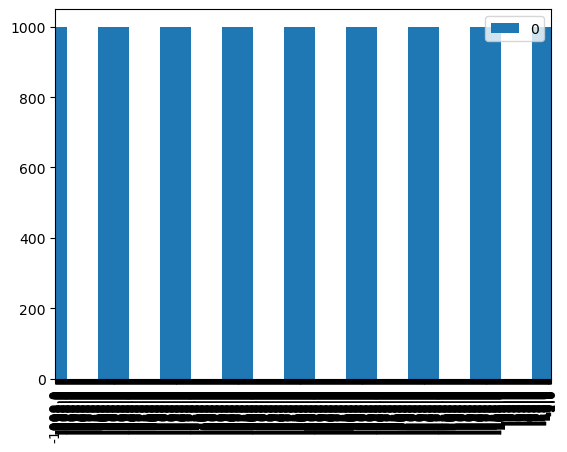

In [5]:
count = Counter(memory)
df = pd.DataFrame.from_dict(count, orient='index')
df.sort_index(inplace=True)
df.plot(kind='bar')

## task 1.1 b)

In [6]:
# N = 10, 100, 1_000
Ns = np.array([10, 100, 1000])
N = Ns[2]

In [7]:
nb_walks = 1_000
possible_steps = 2
p = 1/possible_steps

random_steps = np.random.randint(0, 2, size=(N, nb_walks))
random_steps[random_steps==0] = -1

print(f"{(np.sum(np.sum(random_steps, axis=0) > np.sqrt(N))) / nb_walks:.3f}")
print(f"{(np.sum(np.sum(random_steps, axis=0) > 3*np.sqrt(N))) / nb_walks:.3f}")

0.150
0.000


## task 1.1 c)

In [8]:
possible_steps = 2
p = 1/possible_steps

start_1 = 0
start_2 = 5

In [9]:
nb_steps = 10
random_steps = np.random.randint(0, 2, size=(nb_steps, 2))
random_steps[random_steps==0] = -1

current_pos = np.array([copy.deepcopy(start_1), copy.deepcopy(start_2)])

for col in np.arange(nb_steps):
    #print(f"{current_pos} + {random_steps[col,:]} -> {current_pos + random_steps[col,:]}")
    current_pos += random_steps[col,:]
    if current_pos[0] > current_pos[1]:
        print(f"Agents cross paths in step {col}.")
        break

In [10]:
nb_steps = 10
nb_simulations = 5_000

nb_crossings = 0

for i in range(nb_simulations):
    random_steps = np.random.randint(0, 2, size=(nb_steps, 2))
    random_steps[random_steps==0] = -1
    current_pos = np.array([copy.deepcopy(start_1), copy.deepcopy(start_2)])

    for col in np.arange(nb_steps):
        current_pos += random_steps[col,:]
        if current_pos[0] > current_pos[1]:
            nb_crossings += 1
            break
            
print(f"{nb_crossings/nb_simulations:.3f}")

0.198


## task 2

In [11]:
Ns = np.arange(2, 8)

In [12]:
N = Ns[0]
nb_steps = 10

#field = np.zeros(shape=(N, N))
start_pos = np.array([
    0 if np.random.rand() > 0.5 else N, 
    0 if np.random.rand() > 0.5 else N
])

is_in_corner = True
is_on_edge = True
nb_possible_moves = 4 # 2, 3, 4 are the only possible options

In [44]:
current_pos = copy.deepcopy(start_pos)

for i in range(nb_steps):
    if is_in_corner:
        nb_possible_moves = 2
    elif is_on_edge:
        nb_possible_moves = 3
    else:
        nb_possible_moves = 4
        
    current_pos = np.random.randint(low=0, high=nb_possible_moves)
    
    if (current_pos[0] == 0 or current_pos[0] == N-1) and (current_pos[1] == 0 or current_pos[1] == N-1):
        # agent is in a corner
        is_in_corner = True
        is_on_edge = True
    elif (current_pos[0] == 0 or current_pos[0] == N-1) or (current_pos[1] == 0 or current_pos[1] == N-1):
        # agent is on the edge, but not in a corner
        is_in_corner = False
        is_on_edge = True
    else:
        is_in_corner = False
        is_on_edge = False

TypeError: 'int' object is not subscriptable

In [15]:
current_pos = copy.deepcopy(start_pos)

for i in range(nb_steps):
    while True:
        step = np.random.randint(low=0, high=4)
        if step == 0:
            current_pos[0] -= 1
        elif step == 1:
            current_pos[1] += 1
        elif step == 2:
            current_pos[0] += 1
        elif step == 3:
            current_pos[1] -= 1
            
        if 0 <= current_pos[0] < N and 0 <= current_pos[1] < N:
            break
    print(current_pos)

[1 0]
[1 1]
[1 1]
[1 0]
[1 1]
[1 0]
[1 1]
[1 1]
[1 0]
[0 0]


In [ ]:
range(0, N)